# Data Manipulation with Panda

# Chapter 1: DataFrames and Transforming Data

### Pandas

Python package for data manipulation and Viz.

are built on top of Numpy and Matplotlib

Are designed to work with `rectangular data` or `Tabular Data`

In Panadas the rectanglar data is represented as`DataFrme`
 
### Inspecting a DataFrame

When you get a new DataFrame to work with, the first thing you need to do `is explore it and see what it contains`. 

There are several `useful methods and attributes` for this.

`.head()` returns the first few rows (the “head” of the DataFrame).
    
`.info()` shows information on each of the columns, such as the data type and number of missing values.
    
`.shape` returns the number of rows and columns of the DataFrame.
    
`.describe()` calculates a few summary statistics for each column.

#### `homelessness` - DataFrame
    
homelessness is a DataFrame containing estimates of homelessness in each U.S. state in 2018.

The `individual` column is the number of homeless individuals not part of a family with children.

The `family_members` column is the number of homeless individuals part of a family with children. 

The `state_pop` column is the state's total population.

In [123]:
import pandas as pd

In [124]:
homelessness = pd.read_csv('homelessness.csv')

In [125]:
# Print the head of the homelessness data
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [217]:
# Print information about homelessness
homelessness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
region            51 non-null object
state             51 non-null object
individuals       51 non-null int64
family_members    51 non-null int64
state_pop         51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [218]:
# Print the shape of homelessness
homelessness.shape

(51, 5)

In [219]:
# Print a description of homelessness
homelessness.describe()

,individuals,family_members,state_pop
count,51.000000,51.000000,5.100000e+01
mean,7225.784314,3500.960784,6.405637e+06
std,15991.025083,7806.911612,7.327258e+06
min,434.000000,75.000000,5.776010e+05
25%,1446.500000,550.500000,1.777414e+06
50%,3082.000000,1482.000000,4.461153e+06
75%,6781.500000,3196.000000,7.340946e+06
max,109008.000000,52070.000000,3.946159e+07


### Parts of a DataFrame

To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

`.values`: A two-dimensional NumPy array of values.

`.columns`: An index of columns: the column names.

`.index`: An index for the rows: either row numbers or row names.

You can usually think of `indexes` as being like a list of strings or numbers, though the pandas Index data type allows for more sophisticated options. (These will be covered later in the course.)

`homelessness` is available.

In [122]:
# Import pandas using the alias pd
import pandas as pd
homelessness.head(2)

NameError: name 'homelessness' is not defined

In [221]:
# Print the values of homelessness
homelessness.values[:2]

array([['East South Central', 'Alabama', 2570, 864, 4887681],
       ['Pacific', 'Alaska', 1434, 582, 735139]], dtype=object)

In [222]:
# Print the column index of homelessness
homelessness.columns

Index(['region', 'state', 'individuals', 'family_members', 'state_pop'], dtype='object')

In [223]:
# Print the row index of homelessness
homelessness.index

RangeIndex(start=0, stop=51, step=1)

## 1.1 Sorting and subsetting

### Sorting rows

Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to `.sort_values()`.

In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.

    Sort on             	Syntax
    
    one column----------------->df.sort_values("breed")
    multiple columns----------->df.sort_values(["breed", "weight_kg"])
    
By combining `.sort_values()` with `.head()`, you can answer questions in the form, "What are the top cases where...?".

Import `homelessness` and pandas as pd.

In [224]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Print the top few rows
homelessness_ind.head()

,region,state,individuals,family_members,state_pop
50,Mountain,Wyoming,434,205,577601
34,West North Central,North Dakota,467,75,758080
7,South Atlantic,Delaware,708,374,965479
39,New England,Rhode Island,747,354,1058287
45,New England,Vermont,780,511,624358


In [225]:
# Sort homelessness by descending family members
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [228]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members')

# Print the top few rows
homelessness_fam.head()

,region,state,individuals,family_members,state_pop
34,West North Central,North Dakota,467,75,758080
50,Mountain,Wyoming,434,205,577601
48,South Atlantic,West Virginia,1021,222,1804291
41,West North Central,South Dakota,836,323,878698
24,East South Central,Mississippi,1024,328,2981020


In [229]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region', 'family_members'],ascending = [True, False])

# Print the top few rows
homelessness_reg_fam.head()

,region,state,individuals,family_members,state_pop
13,East North Central,Illinois,6752,3891,12723071
35,East North Central,Ohio,6929,3320,11676341
22,East North Central,Michigan,5209,3142,9984072
49,East North Central,Wisconsin,2740,2167,5807406
14,East North Central,Indiana,3776,1482,6695497


### Subsetting columns

When working with data, you may not need all of the variables in your dataset. Square-brackets (`[]`) can be used to select only the columns that matter to you in an order that makes sense to you. 

To select only `"col_a"` of the DataFrame `df`, use

    df["col_a"]
    
To select `"col_a"` and `"col_b"` of `df`, use

    df[["col_a", "col_b"]]

In [231]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [230]:
# Select the individuals column
individuals = homelessness["individuals"]

# Print top 5 of the result
individuals.head() # This is pandas series

0      2570
1      1434
2      7259
3      2280
4    109008
Name: individuals, dtype: int64

In [235]:
# Select the state and family_members columns
# pass a list of column names

state_fam = homelessness[["state","family_members"]]

# Print the head of the result
state_fam.head()

,state,family_members
0,Alabama,864
1,Alaska,582
2,Arizona,2606
3,Arkansas,432
4,California,20964


In [234]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[["individuals","state" ]]

# Print the head of the result
ind_state.head()

,individuals,state
0,2570,Alabama
1,1434,Alaska
2,7259,Arizona
3,2280,Arkansas
4,109008,California


### Subsetting rows

A large part of data science is about finding which bits of your dataset are **interesting**. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as filtering rows or selecting rows.

There are many ways to subset a DataFrame, `1.` perhaps the most common is to use relational operators to return `True` or `False` for each row, then pass that inside square brackets.

    dogs[dogs["height_cm"] > 60]
    dogs[dogs["color"] == "tan"]
    
You can filter for multiple conditions at once by using the `"logical and"` operator, `&`.

    dogs[(dogs["height_cm"] > 60) & (dogs["col_b"] == "tan")]
    

In [246]:
#*******************SUPER COOL EXERCISE***********************************
# What are states/regions with homeless individuals > 1k and sort by individuals
#Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness["individuals"] >10000]

# See the result
ind_gt_10k.sort_values("individuals",ascending = False)

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588
32,Mid-Atlantic,New York,39827,52070,19530351
9,South Atlantic,Florida,21443,9587,21244317
43,West South Central,Texas,19199,6111,28628666
47,Pacific,Washington,16424,5880,7523869
37,Pacific,Oregon,11139,3337,4181886


In [248]:
#which region in Mountain region has the most state population?
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region'] == 'Mountain']

# See the result
mountain_reg.sort_values("state_pop", ascending = False) 

# Ans: Arizona

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259,2606,7158024
5,Mountain,Colorado,7607,3250,5691287
44,Mountain,Utah,1904,972,3153550
28,Mountain,Nevada,7058,486,3027341
31,Mountain,New Mexico,1949,602,2092741
12,Mountain,Idaho,1297,715,1750536
26,Mountain,Montana,983,422,1060665
50,Mountain,Wyoming,434,205,577601


In [252]:
#A govt bearu around for Pacific region is ready to take measures...
#...where homelessness is severe, where it is more than 3000 family members...
#...so get us those states please? 

# Filter for rows where family_members is grater than 3000 
# and region is Pacific

fam_lt_1k_pac = homelessness[(homelessness["family_members"] >3000) & (homelessness["region"] == "Pacific") ]

# See the result
fam_lt_1k_pac

# Ans: The ststes ,in the Pacific region, with severe homelessness problem 
#are California, Oregon and Washington 

,region,state,individuals,family_members,state_pop
4,Pacific,California,109008,20964,39461588
37,Pacific,Oregon,11139,3337,4181886
47,Pacific,Washington,16424,5880,7523869


### Subsetting rows by categorical variables: `.isin()` method

Subsetting data based on a categorical variable often involves using the "or" operator (`|`) to select rows from multiple categories. **This can get tedious** when you want all states in one of three different regions, for example. **Instead**, use the `.isin()` method, which will allow you to tackle this problem by writing one condition instead of three separate ones.

    colors = ["brown", "black", "tan"]
    condition = dogs["color"].isin(colors)
    dogs[condition]

In [58]:
#Using or oprator |
south_mid_atlantic = homelessness[(homelessness["region"] == "South Atlantic") | (homelessness["region"] == "Mid-Atlantic") ]
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317
10,South Atlantic,Georgia,6943,2556,10511131
20,South Atlantic,Maryland,4914,2230,6035802
30,Mid-Atlantic,New Jersey,6048,3350,8886025
32,Mid-Atlantic,New York,39827,52070,19530351
33,South Atlantic,North Carolina,6451,2817,10381615
38,Mid-Atlantic,Pennsylvania,8163,5349,12800922
40,South Atlantic,South Carolina,3082,851,5084156


In [253]:
#using .isin() method
# Subset for rows in South Atlantic or Mid-Atlantic regions

areas = ["South Atlantic", "Mid-Atlantic" ]

condition = homelessness["region"].isin(areas)

south_mid_atlantic = homelessness[condition]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317
10,South Atlantic,Georgia,6943,2556,10511131
20,South Atlantic,Maryland,4914,2230,6035802
30,Mid-Atlantic,New Jersey,6048,3350,8886025
32,Mid-Atlantic,New York,39827,52070,19530351
33,South Atlantic,North Carolina,6451,2817,10381615
38,Mid-Atlantic,Pennsylvania,8163,5349,12800922
40,South Atlantic,South Carolina,3082,851,5084156


In [66]:
#We can make it compact by substituting
#using .isin() method
# Subset for rows in South Atlantic or Mid-Atlantic regions
 
south_mid_atlantic = homelessness[homelessness["region"].isin(["South Atlantic", "Mid-Atlantic" ])]

# See the result
south_mid_atlantic

,region,state,individuals,family_members,state_pop
7,South Atlantic,Delaware,708,374,965479
8,South Atlantic,District of Columbia,3770,3134,701547
9,South Atlantic,Florida,21443,9587,21244317
10,South Atlantic,Georgia,6943,2556,10511131
20,South Atlantic,Maryland,4914,2230,6035802
30,Mid-Atlantic,New Jersey,6048,3350,8886025
32,Mid-Atlantic,New York,39827,52070,19530351
33,South Atlantic,North Carolina,6451,2817,10381615
38,Mid-Atlantic,Pennsylvania,8163,5349,12800922
40,South Atlantic,South Carolina,3082,851,5084156


In [67]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
mojave_homelessness

,region,state,individuals,family_members,state_pop
2,Mountain,Arizona,7259,2606,7158024
4,Pacific,California,109008,20964,39461588
28,Mountain,Nevada,7058,486,3027341
44,Mountain,Utah,1904,972,3153550


## 1.2 Adding new columns / transforming DF

You aren't stuck with just the data you are given. Instead, **you can add new columns** to a DataFrame. This has many names, such as `transforming`, `mutating`, and `feature engineering`.

You can create new columns **from scratch**, but it is **also common to derive them from other columns**, for example, by adding columns together, or by changing their units.


In [254]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570,864,4887681,3434,0.748398
1,Pacific,Alaska,1434,582,735139,2016,0.711310
2,Mountain,Arizona,7259,2606,7158024,9865,0.735834
3,West South Central,Arkansas,2280,432,3009733,2712,0.840708
4,Pacific,California,109008,20964,39461588,129972,0.838704


### Combo-attack! / Multiple Manipulation -bringing it all together

You've seen `the four most common types of data manipulation`: 
    
    1.sorting rows, 
    2.subsetting columns, 
    3.subsetting rows, and 
    4.adding new columns. 

In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.

In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" `Combine your new pandas skills` to find out.

In [255]:
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals
0,East South Central,Alabama,2570,864,4887681,3434,0.748398
1,Pacific,Alaska,1434,582,735139,2016,0.711310
2,Mountain,Arizona,7259,2606,7158024,9865,0.735834
3,West South Central,Arkansas,2280,432,3009733,2712,0.840708
4,Pacific,California,109008,20964,39461588,129972,0.838704


In [88]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]
homelessness.head()

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
0,East South Central,Alabama,2570,864,4887681,3434,0.748398,5.258117
1,Pacific,Alaska,1434,582,735139,2016,0.711310,19.506515
2,Mountain,Arizona,7259,2606,7158024,9865,0.735834,10.141067
3,West South Central,Arkansas,2280,432,3009733,2712,0.840708,7.575423
4,Pacific,California,109008,20964,39461588,129972,0.838704,27.623825


In [89]:

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]
high_homelessness

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
4,Pacific,California,109008,20964,39461588,129972,0.838704,27.623825
8,South Atlantic,District of Columbia,3770,3134,701547,6904,0.546060,53.738381
11,Pacific,Hawaii,4131,2399,1420593,6530,0.632619,29.079406
28,Mountain,Nevada,7058,486,3027341,7544,0.935578,23.314189
32,Mid-Atlantic,New York,39827,52070,19530351,91897,0.433387,20.392363
37,Pacific,Oregon,11139,3337,4181886,14476,0.769481,26.636307
47,Pacific,Washington,16424,5880,7523869,22304,0.736370,21.829195


In [90]:
# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)
high_homelessness_srt

,region,state,individuals,family_members,state_pop,total,p_individuals,indiv_per_10k
8,South Atlantic,District of Columbia,3770,3134,701547,6904,0.546060,53.738381
11,Pacific,Hawaii,4131,2399,1420593,6530,0.632619,29.079406
4,Pacific,California,109008,20964,39461588,129972,0.838704,27.623825
37,Pacific,Oregon,11139,3337,4181886,14476,0.769481,26.636307
28,Mountain,Nevada,7058,486,3027341,7544,0.935578,23.314189
47,Pacific,Washington,16424,5880,7523869,22304,0.736370,21.829195
32,Mid-Atlantic,New York,39827,52070,19530351,91897,0.433387,20.392363


In [91]:
# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]
# See the result
result

,state,indiv_per_10k
8,District of Columbia,53.738381
11,Hawaii,29.079406
4,California,27.623825
37,Oregon,26.636307
28,Nevada,23.314189
47,Washington,21.829195
32,New York,20.392363


# Chapter 2: Aggregating Data

## 2.1 Summary statistics

#### Mean and median

`Summary statistics` are exactly what they sound like - they summarize `many numbers in one statistic`. 

For example, mean, median, minimum, maximum, and standard deviation are summary statistics.

Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it.

In [256]:
import pandas as pd

In [258]:
height_weight = pd.read_csv('Height_weight.csv')
height_weight.head()

,Country_name,Av_ height_m_meter,Av_Wt_m_kg,BMI_m,Av_ height_f_meter,Av_Wt_f_kg,BMI_f
0,Netherlands,1.83,87.4,26.1,1.69,72.3,25.3
1,Latvia,1.81,88.8,27.1,1.69,75.4,26.4
2,Denark,1.81,86.2,26.3,1.68,69.4,24.6
3,Estonia,1.81,88.5,27.0,1.68,73.4,26.0
4,Bosnia,1.81,86.5,26.4,1.67,70.6,25.3


In [260]:
#what is the avergae height of males in the world??

print(height_weight['Av_ height_m_meter'].mean())

1.7250381679389315


In [262]:
#what is the median height of males in the world??
print(height_weight['Av_ height_m_meter'].median())

1.72


In [265]:
#what is the average minimum height of males in the world??
print(height_weight['Av_ height_m_meter'].min())

1.6


In [267]:
#what is the average maximum height of males in the world??
print(height_weight['Av_ height_m_meter'].max())

1.83


In [271]:
#what is the  variance height of males in the world in cm??

var_in_cm = (height_weight['Av_ height_m_meter'].var())*100
print(var_in_cm)

0.2931344685848508


In [272]:
#what is the  std height of males in the world in cm??
std_in_cm = (height_weight['Av_ height_m_meter'].std())*100
print(std_in_cm)

5.414189399945765


### Summarizing dates

Summary statistics can also be calculated on date columns which have values with the data type `datetime64`. 

Some summary statistics — like `mean` — don't make a ton of sense on dates, but others are super helpful, for example `minimum and maximum`, which `allow you to see what time range` your data covers.

### Efficient summaries: .agg() method

While pandas and NumPy have tons of functions, sometimes you may need a different function to summarize your data.

The `.agg()` method **allows you to apply your own custom functions** to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations **super efficient**.

### Multiple summaries for a single column 

Find multiple summaries for a column named `Av_ height_m_meter`

In [292]:
# A custom IQR function
def meanfunc(column):
    return column.mean()

def maxfunc(column):
    return column.max()

def minfunc(column):
    return column.min()

def varfunc(column):
    return column.var()
    
# Print multiple summaries for the av weight of males
height_weight['Av_ height_m_meter'].agg([meanfun, maxfunc, minfunc, varfunc])

meanfun    1.725038
maxfunc    1.830000
minfunc    1.600000
varfunc    0.002931
Name: Av_ height_m_meter, dtype: float64

In [293]:
#OR Using Numpy    
# Print multiple summaries for the av weight of males
height_weight['Av_ height_m_meter'].agg([np.mean, np.max, np.min, np.var])

mean    1.725038
amax    1.830000
amin    1.600000
var     0.002931
Name: Av_ height_m_meter, dtype: float64

### Multiple Summaries over a list of column_names

In [295]:
# Print multiple summaries over a list of col names

height_weight[['Av_ height_m_meter','Av_Wt_m_kg', 'BMI_m','Av_ height_f_meter','Av_Wt_f_kg', 'BMI_f']].agg([np.mean, np.max, np.min, np.var, np.std])

,Av_ height_m_meter,Av_Wt_m_kg,BMI_m,Av_ height_f_meter,Av_Wt_f_kg,BMI_f
mean,1.725038,77.710687,26.002290,1.602366,68.141221,26.470992
amax,1.830000,102.500000,33.100000,1.690000,95.800000,35.200000
amin,1.600000,54.300000,20.100000,1.490000,48.300000,21.000000
var,0.002931,125.009423,7.386841,0.002226,90.252903,9.226383
std,0.054142,11.180761,2.717874,0.047179,9.500153,3.037496


In [296]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(homelessness[["individuals", "family_members", "state_pop"]].agg([iqr, np.median, np.mean, np.min]))

        individuals  family_members     state_pop
iqr     5335.000000     2645.500000  5.563533e+06
median  3082.000000     1482.000000  4.461153e+06
mean    7225.784314     3500.960784  6.405637e+06
amin     434.000000       75.000000  5.776010e+05


### Cumulative statistics

Cumulative statistics can also be helpful in tracking `summary statistics` `over time`. 


In this exercise, you'll calculate the cumulative sum and cumulative max.

In [291]:
# 'sales_1_1' data NOT avalable


# Sort sales_1_1 by date

#sales_1_1=sales_1_1.sort_values("date")

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
#sales_1_1["cum_weekly_sales"] = sales_1_1["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
#sales_1_1["cum_max_sales"] = sales_1_1["weekly_sales"].cummax()

# See the columns you calculated
#print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

## 2.2 Counting

#### Dropping duplicates

Removing duplicates is an essential skill to get accurate counts, because often you don't want to count the same thing multiple times. 

In [3]:
import pandas as pd

In [4]:
vet_visits = pd.read_csv('dogs.csv')
vet_visits

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


### Drop duplicates

Before we count we may want to drop duplicate types.

#### example code

    store_depts = sales.drop_duplicates(subset=['store', 'department'])
    print(store_depts.head())

Subset the rows that are holiday weeks and drop duplicate dates

    holiday_dates = sales[sales['is_holiday']].drop_duplicates('date')

Print date col of holiday_dates

    print(holiday_dates)
    
### Let's say we wanted to count unique number of dogs that visited the local vet doc

In this case we need to drop duplicates before we count.

`.drop_duplicates()` is the method.

In [5]:
unique_colors = vet_visits.drop_duplicates(subset = 'color')
unique_colors

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


### Dropping Duplicate pairs

Lets drop dogs that have the same `color and name`

In [6]:
net_visits = vet_visits.drop_duplicates(subset = ['color', 'name'])
net_visits

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


### Counting categorical variables

`Counting` is a great way `to get an overview of your data` and to spot curiosities that you might not notice otherwise.

### Count the number of stores of each type example code

    store_counts = stores["type"].value_counts()
    print(store_counts)

Get the `proportion` of stores of each type

    store_props = stores["type"].value_counts(normalize = True)
    print(store_props)

Count the number of departments of each type and sort

    dept_counts_sorted = departments['department'].value_counts(sort=True)
    print(dept_counts_sorted)

Get the proportion of departments of each type and sort

    dept_props_sorted = departments['department'].value_counts(sort=True, normalize= True)
    print(dept_props_sorted)

### How many dogs are there that are Labrador breed

In [7]:
vet_visits

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [8]:
Dog_counts = vet_visits['breed'].value_counts(sort = True)
Dog_counts

Labrador       2
Poodle         1
Schnauzer      1
st. Bernand    1
Chihua         1
Chow Chow      1
Name: breed, dtype: int64

### count as a proportion

In [9]:
Dog_counts_norm = vet_visits['breed'].value_counts(normalize = True)
Dog_counts_norm

Labrador       0.285714
Poodle         0.142857
Schnauzer      0.142857
st. Bernand    0.142857
Chihua         0.142857
Chow Chow      0.142857
Name: breed, dtype: float64

## 2.3 Grouped summary statistics

### What percent of sales occurred at each store type?

While `.groupby()` is useful, you can calculate grouped summary statistics without it.

Walmart distinguishes three types of stores: "supercenters", "discount stores", and "neighborhood markets", encoded in this dataset as type "A", "B", and "C". In this exercise, you'll calculate the total sales made at each store type, without using .groupby(). You can then use these numbers to see what proportion of Walmart's total sales were made at each.

### example code

Calc total weekly sales
    
    sales_all = sales["weekly_sales"].sum()

Subset for type A stores, calc total weekly sales

    sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

Subset for type B stores, calc total weekly sales

    sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

Subset for type C stores, calc total weekly sales

    sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

Get proportion for each type

    sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
    print(sales_propn_by_type)

### Calculations with .groupby()

The `.groupby()` method **makes life much easier**. 

In this exercise, you'll perform the same calculations as last time, except you'll use the .groupby() method. 

You'll also perform calculations on data grouped by two variables to see if sales differs by store type depending on if it's a holiday week or not.

sales is available and pandas is loaded as pd.

### ex. code

Group by type; calc total weekly sales

    sales_by_type = sales.groupby("type")["weekly_sales"].sum()

Get proportion for each type

    sales_propn_by_type = sales_by_type/sales["weekly_sales"].sum()
    print(sales_propn_by_type)

In [10]:
vet_visits.groupby('color')['weight_kg'].mean()

color
Black    26.5
Brown    24.0
Gray     17.0
Tan       2.0
White    74.0
Name: weight_kg, dtype: float64

### Multiple grouped summaries

Earlier in this chapter you saw that the `.agg()` method is useful to compute multiple statistics on multiple variables. 

It also works with grouped data. NumPy, which is imported as np, has many different summary statistics functions, including:

    np.min()
    np.max()
    np.mean()
    np.median()
    
### Multiple grouped summaries for dogs

In [11]:
vet_visits.groupby('color')['weight_kg'].agg([min, max, sum])

,min,max,sum
color,,,
Black,24,29,53
Brown,24,24,48
Gray,17,17,17
Tan,2,2,2
White,74,74,74


ex. code

Import NumPy with the alias np
    
    import numpy as np

For each store type, aggregate weekly_sales: get min, max, mean, and median

    sales_stats = sales.groupby("type")["weekly_sales"].agg([np.min,np.max,np.mean,np.median])

Print sales_stats

    print(sales_stats)

For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median

`unemp_fuel_stats = sales.groupby("type")[["unemployment","fuel_price_usd_per_l"]].agg([np.min,np.max,np.mean,np.median])`


Print unemp_fuel_stats

    unemp_fuel_stats

### group by multiple variable (columns)

In [13]:
import numpy as np
vet_visits.groupby(['color','breed'])[['weight_kg', 'height_cm']].agg([min, max,np.mean])

weight_kg          height_cm         
                        min max mean       min max mean
color breed                                            
Black Labrador           29  29   29        59  59   59
      Poodle             24  24   24        43  43   43
Brown Chow Chow          24  24   24        46  46   46
      Labrador           24  24   24        56  56   56
Gray  Schnauzer          17  17   17        49  49   49
Tan   Chihua              2   2    2        18  18   18
White st. Bernand        74  74   74        77  77   77

### Pivot tables

### Pivoting on one variable

`Pivot tables` are **the standard way of aggregating data** in spreadsheets. 

In pandas, pivot tables are essentially just **another way of performing grouped calculations**. That is, the `.pivot_table()` method is just an alternative to `.groupby()`.

In this exercise, you'll perform calculations using `.pivot_table()` to replicate the calculations you performed in the last lesson using `.groupby()`.

sales is available and pandas is imported as pd.

In [14]:
vet_visits

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [15]:
vet_visits.groupby('color')['weight_kg'].mean()

color
Black    26.5
Brown    24.0
Gray     17.0
Tan       2.0
White    74.0
Name: weight_kg, dtype: float64

In [16]:
vet_visits.pivot_table(values= 'weight_kg', index='color')

,weight_kg
color,
Black,26.5
Brown,24.0
Gray,17.0
Tan,2.0
White,74.0


### Multiple Summary statistics using .pivot_table()

In [17]:
vet_visits.groupby('color')[['weight_kg']].agg([np.mean, np.median])

weight_kg       
           mean median
color                 
Black      26.5   26.5
Brown      24.0   24.0
Gray       17.0   17.0
Tan         2.0    2.0
White      74.0   74.0

In [18]:
vet_visits.pivot_table(values= 'weight_kg', index='color', aggfunc= [np.mean,np.median])

,mean,median
,weight_kg,weight_kg
color,,
Black,26.5,26.5
Brown,24.0,24.0
Gray,17.0,17.0
Tan,2.0,2.0
White,74.0,74.0


### pivot on two variables

In [347]:
vet_visits.groupby(['color','breed'])[['weight_kg', 'height_cm']].agg([np.mean, np.median])

weight_kg        height_cm       
                       mean median      mean median
color breed                                        
Black Labrador           29     29        59     59
      Poodle             24     24        43     43
Brown Chow Chow          24     24        46     46
      Labrador           24     24        56     56
Gray  Schnauzer          17     17        49     49
Tan   Chihua              2      2        18     18
White st. Bernand        74     74        77     77

In [19]:
vet_visits.pivot_table(values= ['weight_kg', 'height_cm'], index=['color','breed'], aggfunc= [np.mean,np.median])

mean              median          
                  height_cm weight_kg height_cm weight_kg
color breed                                              
Black Labrador           59        29        59        29
      Poodle             43        24        43        24
Brown Chow Chow          46        24        46        24
      Labrador           56        24        56        24
Gray  Schnauzer          49        17        49        17
Tan   Chihua             18         2        18         2
White st. Bernand        77        74        77        74

### Fill in missing values and sum values with pivot tables

The `.pivot_table()` method has several useful arguments, including `fill_value` and `margins`.

`fill_value` *replaces missing values* with a real value **(known as imputation)**. What to replace missing values with is a topic big enough to have its own course (Dealing with Missing Data in Python), but the simplest thing to do is to substitute **a dummy value**.

In [20]:
vet_visits.pivot_table(values= 'weight_kg', index='color',columns= 'breed', aggfunc= [np.mean,np.median])

mean                                                 median            \
breed Chihua Chow Chow Labrador Poodle Schnauzer st. Bernand Chihua Chow Chow   
color                                                                           
Black    NaN       NaN     29.0   24.0       NaN         NaN    NaN       NaN   
Brown    NaN      24.0     24.0    NaN       NaN         NaN    NaN      24.0   
Gray     NaN       NaN      NaN    NaN      17.0         NaN    NaN       NaN   
Tan      2.0       NaN      NaN    NaN       NaN         NaN    2.0       NaN   
White    NaN       NaN      NaN    NaN       NaN        74.0    NaN       NaN   

                                             
breed Labrador Poodle Schnauzer st. Bernand  
color                                        
Black     29.0   24.0       NaN         NaN  
Brown     24.0    NaN       NaN         NaN  
Gray       NaN    NaN      17.0         NaN  
Tan        NaN    NaN       NaN         NaN  
White      NaN    NaN       NaN        74.0

In [21]:
vet_visits.pivot_table(values= 'weight_kg', index='color',columns= 'breed', fill_value=0, aggfunc= [np.mean,np.median])

mean                                                 median            \
breed Chihua Chow Chow Labrador Poodle Schnauzer st. Bernand Chihua Chow Chow   
color                                                                           
Black      0         0       29     24         0           0      0         0   
Brown      0        24       24      0         0           0      0        24   
Gray       0         0        0      0        17           0      0         0   
Tan        2         0        0      0         0           0      2         0   
White      0         0        0      0         0          74      0         0   

                                             
breed Labrador Poodle Schnauzer st. Bernand  
color                                        
Black       29     24         0           0  
Brown       24      0         0           0  
Gray         0      0        17           0  
Tan          0      0         0           0  
White        0      0         0          74

In [22]:
vet_visits.pivot_table(values= 'weight_kg', index='color',columns= 'breed', fill_value=0)

breed,Chihua,Chow Chow,Labrador,Poodle,Schnauzer,st. Bernand
color,,,,,,
Black,0,0,29,24,0,0
Brown,0,24,24,0,0,0
Gray,0,0,0,0,17,0
Tan,2,0,0,0,0,0
White,0,0,0,0,0,74


### margins = True

`margins` is a shortcut for when you pivoted *by two variables*, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.

In [23]:
vet_visits.pivot_table(values= 'weight_kg', index='color',columns= 'breed', fill_value=0, margins = True)

breed,Chihua,Chow Chow,Labrador,Poodle,Schnauzer,st. Bernand,All
color,,,,,,,
Black,0,0,29,24,0,0,26.500000
Brown,0,24,24,0,0,0,24.000000
Gray,0,0,0,0,17,0,17.000000
Tan,2,0,0,0,0,0,2.000000
White,0,0,0,0,0,74,74.000000
All,2,24,26,24,17,74,27.714286


## pivot_table all in one

In [24]:
vet_visits.pivot_table(values= ['height_cm', 'weight_kg'], index=['color','breed'], margins=True, aggfunc= [np.median,np.mean])

median                mean          
                  height_cm weight_kg height_cm weight_kg
color breed                                              
Black Labrador           59        29        59        29
      Poodle             43        24        43        24
Brown Chow Chow          46        24        46        24
      Labrador           56        24        56        24
Gray  Schnauzer          49        17        49        17
Tan   Chihua             18         2        18         2
White st. Bernand        77        74        77        74
All                      49        24        49        27

# Chapter 3: Slicing and Indexing Data

# 3.1 Explicit Indexing

## Setting an index:  `.set_index()` method

Is setting a column as the index for the dataFrame

We use `.set_index()` method

##### BY THE WAY: WE CAN SET INDEX RIGHT ON WHEN WE READ OUR FILE USING .read_csv().

In [2]:
import pandas as pd

In [3]:
dogs = pd.read_csv('dogs.csv')
dogs

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


### Let's set an name of the dogs DF  as an index

In [4]:
dogs_name_index = dogs.set_index('name')
dogs_name_index # as you can see now the name is set as an index!! Impressive huh?!

,breed,color,height_cm,weight_kg,date_of_birth,height_m
name,,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18
Bernie,st. Bernand,White,77,74,2018-02-27,0.77


### Setting an Index with `.read_csv()` Method!

In [5]:
dogs = pd.read_csv('dogs.csv', index_col=['name','breed'])
dogs

,,color,height_cm,weight_kg,date_of_birth,height_m
name,breed,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18
Bernie,st. Bernand,White,77,74,2018-02-27,0.77


## Removing an index: `.reset_index()` method

Let's say we no longer want the `name` as an index, how do we remove it??


In [21]:
dogs_name_index.reset_index() 

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


As you can see reseting an index gives us the original DF , the one before we set the index.

## Removing an index with `drop` argument

Discards the index same as deleting a column from the original DF

`.reset_index(drop = True)`

In [13]:
dogs_name_index

,breed,color,height_cm,weight_kg,date_of_birth,height_m
name,,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18
Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [14]:
dogs_name_index.reset_index(drop=True)

,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Labrador,Brown,56,24,2013-07-01,0.56
1,Poodle,Black,43,24,2016-09-16,0.43
2,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Labrador,Black,59,29,2017-01-20,0.59
5,Chihua,Tan,18,2,2015-04-20,0.18
6,st. Bernand,White,77,74,2018-02-27,0.77


## WHY INDEXING THOUGH???

### Reason -1: Indexes make subsetting simpler

In [15]:
#complicated
dogs[dogs['name'].isin(['Bella', 'Stella'])]

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18


In [17]:
# simpler with indexing

dogs_name_index.loc[['Bella', 'Stella']]

,breed,color,height_cm,weight_kg,date_of_birth,height_m
name,,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Stella,Chihua,Tan,18,2,2015-04-20,0.18


### Reason -2: Indexes values does NOT need to be unique

In [19]:
# step 1 : indexing
dogs_breed_index = dogs.set_index('breed')
dogs_breed_index

,name,color,height_cm,weight_kg,date_of_birth,height_m
breed,,,,,,
Labrador,Bella,Brown,56,24,2013-07-01,0.56
Poodle,Charlie,Black,43,24,2016-09-16,0.43
Chow Chow,Lucy,Brown,46,24,2014-08-25,0.46
Schnauzer,Cooper,Gray,49,17,2011-12-11,0.49
Labrador,Max,Black,59,29,2017-01-20,0.59
Chihua,Stella,Tan,18,2,2015-04-20,0.18
st. Bernand,Bernie,White,77,74,2018-02-27,0.77


In [20]:
# step -2: Subsetting

dogs_breed_index.loc['Labrador']

,name,color,height_cm,weight_kg,date_of_birth,height_m
breed,,,,,,
Labrador,Bella,Brown,56,24,2013-07-01,0.56
Labrador,Max,Black,59,29,2017-01-20,0.59


As you can see it is **possible to have an index with a redundent name** i.e. non unique index name!

### Reason -3: It allows Multi-Level-Indexes (Hierarchical Indexes)

We can have more than one index for our DF, as many indexes as we want!

See the example below!

In [46]:
dogs_breed_color_index = dogs.set_index(['breed','color'])
dogs_breed_color_index

,,name,height_cm,weight_kg,date_of_birth,height_m
breed,color,,,,,
Labrador,Brown,Bella,56,24,2013-07-01,0.56
Poodle,Black,Charlie,43,24,2016-09-16,0.43
Chow Chow,Brown,Lucy,46,24,2014-08-25,0.46
Schnauzer,Gray,Cooper,49,17,2011-12-11,0.49
Labrador,Black,Max,59,29,2017-01-20,0.59
Chihua,Tan,Stella,18,2,2015-04-20,0.18
st. Bernand,White,Bernie,77,74,2018-02-27,0.77


As you can see now we have two level indexes. `Outer level` index being by `breed` while the `inner level` index being `color`.

### Subsetting multi-level indexing

### substtting the `outer level`

To subset outer level of of an index of a DF, pass a list of values in the outer index.

See the example below!

In [26]:
dogs_breed_color_index.loc[['Labrador','Chihua']]

name  height_cm  weight_kg date_of_birth  height_m
breed    color                                                      
Labrador Brown   Bella         56         24    2013-07-01      0.56
         Black     Max         59         29    2017-01-20      0.59
Chihua   Tan    Stella         18          2    2015-04-20      0.18

### Subsetting based on both the `outer level` and the `inner level`

To subset both the outr and the inner level of the index pass a list of tuples.

A pair in each tuple represents the outer and the inner indexing respectively.

Check out the example below:

In [29]:
dogs_breed_color_index.loc[[('Labrador','Brown'),('Chihua', 'Tan')]]

,,name,height_cm,weight_kg,date_of_birth,height_m
breed,color,,,,,
Labrador,Brown,Bella,56,24,2013-07-01,0.56
Chihua,Tan,Stella,18,2,2015-04-20,0.18


`For two level indexing` there will be `two values in each tuple`, for three level indexing there will be three values in each tuple ...and so on.

### Additional example: Three level indexing

In [31]:
# creating three level index
dogs_name_breed_color_index = dogs.set_index(['name','breed','color'])
dogs_name_breed_color_index

,,,height_cm,weight_kg,date_of_birth,height_m
name,breed,color,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18
Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [33]:
# subsetting three level index
dogs_name_breed_color_index.loc[[('Bella','Labrador','Brown'),('Max', 'Labrador', 'Black')]]

,,,height_cm,weight_kg,date_of_birth,height_m
name,breed,color,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Max,Labrador,Black,59,29,2017-01-20,0.59


As we can see above **the more number of indexes we have, the better control we have to access very specific values**. This is handy in case where we want to enumerate outliers in almost manually selecting approach.

### Reason -4: We can sort using index values

In chapter 1 we saw how to sort using `.sort_values()` method

Here's a quick recap!

In [37]:
# Sort dogs by their name
dogs_by_name = dogs.sort_values('name')

# Print
dogs_by_name

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18


### sorting by index: .sort_index()

By default `sort_index()` sorts from outer_inner_ascending order.

In [40]:
#step-1: indexing
dogs_name_breed_index = dogs.set_index(['name','breed'])
dogs_name_breed_index

,,color,height_cm,weight_kg,date_of_birth,height_m
name,breed,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18
Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [45]:
## step-2: sorting
dogs_name_breed_index.sort_index(level=['name','breed'], ascending=[True,False])

,,color,height_cm,weight_kg,date_of_birth,height_m
name,breed,,,,,
Bella,Labrador,Brown,56,24,2013-07-01,0.56
Bernie,st. Bernand,White,77,74,2018-02-27,0.77
Charlie,Poodle,Black,43,24,2016-09-16,0.43
Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
Max,Labrador,Black,59,29,2017-01-20,0.59
Stella,Chihua,Tan,18,2,2015-04-20,0.18


**Note that** the values in the list of level must be `those that are in the index level`, otherwise this will throw an `error`.

## Pros and cons of indexing

## Pros

Realtvely less complicated indexing
Possibility to have multi-level indexing

## Cons

Index values are just data

Indexes violate tidy data principle

You need too learn two syntaxes

# 3.2 Slicing and subsetting with .loc and .iloc

### Slising lists

Index starts at 0

Final index n-1

In [48]:
doggy_list = ['Bella', 'Nella', 'Bernie', 'Ponie']

In [50]:
doggy_list[:]

['Bella', 'Nella', 'Bernie', 'Ponie']

In [53]:
doggy_list[1:3] # last index not included

['Nella', 'Bernie']

## Slising a DataFrame

slising Steps:

1. Set_index

2. sort

3. slice

In [55]:
dogs = pd.read_csv('dogs.csv')
dogs

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


In [59]:
### index and sort

dogs_breed_color_indexed_sorted=dogs.set_index(['breed','color']).sort_index()
dogs_breed_color_indexed_sorted
dbcis=dogs_breed_color_indexed_sorted
dbcis

name  height_cm  weight_kg date_of_birth  height_m
breed       color                                                       
Chihua      Tan     Stella         18          2    2015-04-20      0.18
Chow Chow   Brown     Lucy         46         24    2014-08-25      0.46
Labrador    Black      Max         59         29    2017-01-20      0.59
            Brown    Bella         56         24    2013-07-01      0.56
Poodle      Black  Charlie         43         24    2016-09-16      0.43
Schnauzer   Gray    Cooper         49         17    2011-12-11      0.49
st. Bernand White   Bernie         77         74    2018-02-27      0.77

### Slising the OUTER index level of the DF

In [61]:
dbcis.loc['Chow Chow':'Poodle']

name  height_cm  weight_kg date_of_birth  height_m
breed     color                                                       
Chow Chow Brown     Lucy         46         24    2014-08-25      0.46
Labrador  Black      Max         59         29    2017-01-20      0.59
          Brown    Bella         56         24    2013-07-01      0.56
Poodle    Black  Charlie         43         24    2016-09-16      0.43

As you can see here, the last value Poodle is included.

### The same technique doesn't work for inner indexing

Returns empty DF

In [64]:
dbcis.loc['Tan':'Grey']

,,name,height_cm,weight_kg,date_of_birth,height_m
breed,color,,,,,


In [65]:
dbcis

name  height_cm  weight_kg date_of_birth  height_m
breed       color                                                       
Chihua      Tan     Stella         18          2    2015-04-20      0.18
Chow Chow   Brown     Lucy         46         24    2014-08-25      0.46
Labrador    Black      Max         59         29    2017-01-20      0.59
            Brown    Bella         56         24    2013-07-01      0.56
Poodle      Black  Charlie         43         24    2016-09-16      0.43
Schnauzer   Gray    Cooper         49         17    2011-12-11      0.49
st. Bernand White   Bernie         77         74    2018-02-27      0.77

### Slising with the Inner index of DF - Use tuples

    DF.LOC[():()]

In [67]:
dbcis.loc[('Labrador', 'Brown'):('Schnauzer','st. Bernand')]

,,name,height_cm,weight_kg,date_of_birth,height_m
breed,color,,,,,
Labrador,Brown,Bella,56,24,2013-07-01,0.56
Poodle,Black,Charlie,43,24,2016-09-16,0.43
Schnauzer,Gray,Cooper,49,17,2011-12-11,0.49


### Slising Columns - Horizontal slising

Since DF is a 2D object we can also slice by column

In [69]:
# returns the full DF
dbcis.loc[:,:]

name  height_cm  weight_kg date_of_birth  height_m
breed       color                                                       
Chihua      Tan     Stella         18          2    2015-04-20      0.18
Chow Chow   Brown     Lucy         46         24    2014-08-25      0.46
Labrador    Black      Max         59         29    2017-01-20      0.59
            Brown    Bella         56         24    2013-07-01      0.56
Poodle      Black  Charlie         43         24    2016-09-16      0.43
Schnauzer   Gray    Cooper         49         17    2011-12-11      0.49
st. Bernand White   Bernie         77         74    2018-02-27      0.77

In [72]:
dbcis.loc[:,'name':'weight_kg']

#weight_kg is included

name  height_cm  weight_kg
breed       color                               
Chihua      Tan     Stella         18          2
Chow Chow   Brown     Lucy         46         24
Labrador    Black      Max         59         29
            Brown    Bella         56         24
Poodle      Black  Charlie         43         24
Schnauzer   Gray    Cooper         49         17
st. Bernand White   Bernie         77         74

### Slising by Row and Column at the same time

In [74]:
dbcis.loc[('Labrador', 'Brown'):('Schnauzer','st. Bernand'), 'name':'height_cm']

,,name,height_cm
breed,color,,
Labrador,Brown,Bella,56
Poodle,Black,Charlie,43
Schnauzer,Gray,Cooper,49


### Slising by Date

Before slising  by date:

1. set the index to date

2. sort

3. slice

In [78]:
dogs_date_index_sorted=dogs.set_index('date_of_birth').sort_index()
ddis = dogs_date_index_sorted
ddis

,name,breed,color,height_cm,weight_kg,height_m
date_of_birth,,,,,,
2011-12-11,Cooper,Schnauzer,Gray,49,17,0.49
2013-07-01,Bella,Labrador,Brown,56,24,0.56
2014-08-25,Lucy,Chow Chow,Brown,46,24,0.46
2015-04-20,Stella,Chihua,Tan,18,2,0.18
2016-09-16,Charlie,Poodle,Black,43,24,0.43
2017-01-20,Max,Labrador,Black,59,29,0.59
2018-02-27,Bernie,st. Bernand,White,77,74,0.77


In [80]:
ddis.loc['2014-08-25':'2016-09-16']

,name,breed,color,height_cm,weight_kg,height_m
date_of_birth,,,,,,
2014-08-25,Lucy,Chow Chow,Brown,46,24,0.46
2015-04-20,Stella,Chihua,Tan,18,2,0.18
2016-09-16,Charlie,Poodle,Black,43,24,0.43


### Slising by Partial Date

In [82]:
ddis.loc['2014':'2016']

,name,breed,color,height_cm,weight_kg,height_m
date_of_birth,,,,,,
2014-08-25,Lucy,Chow Chow,Brown,46,24,0.46
2015-04-20,Stella,Chihua,Tan,18,2,0.18


## Slising by using .iloc[]

The .ilcoc[] method is the same except that it `behaves just like tuple slising!`

In [83]:
dbcis

name  height_cm  weight_kg date_of_birth  height_m
breed       color                                                       
Chihua      Tan     Stella         18          2    2015-04-20      0.18
Chow Chow   Brown     Lucy         46         24    2014-08-25      0.46
Labrador    Black      Max         59         29    2017-01-20      0.59
            Brown    Bella         56         24    2013-07-01      0.56
Poodle      Black  Charlie         43         24    2016-09-16      0.43
Schnauzer   Gray    Cooper         49         17    2011-12-11      0.49
st. Bernand White   Bernie         77         74    2018-02-27      0.77

In [86]:
dbcis.iloc[2:6,1:4]

height_cm  weight_kg date_of_birth
breed     color                                    
Labrador  Black         59         29    2017-01-20
          Brown         56         24    2013-07-01
Poodle    Black         43         24    2016-09-16
Schnauzer Gray          49         17    2011-12-11

## 3.3 Working with pivot tables

In pivot tables every column contains the same data type!

In [26]:
vet_visits.pivot_table(values= ['height_cm', 'weight_kg'], index=['color','breed'], margins=True, aggfunc= [np.median,np.mean])

median                mean          
                  height_cm weight_kg height_cm weight_kg
color breed                                              
Black Labrador           59        29        59        29
      Poodle             43        24        43        24
Brown Chow Chow          46        24        46        24
      Labrador           56        24        56        24
Gray  Schnauzer          49        17        49        17
Tan   Chihua             18         2        18         2
White st. Bernand        77        74        77        74
All                      49        24        49        27

In [30]:
vet_visits.pivot_table(values='height_cm', index='breed')

,height_cm
breed,
Chihua,18.0
Chow Chow,46.0
Labrador,57.5
Poodle,43.0
Schnauzer,49.0
st. Bernand,77.0


In [35]:
dogs_height_by_breed_vs_color = vet_visits.pivot_table(values='height_cm', index='breed' , columns = 'color')
dogs_height_by_breed_vs_color

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chihua,NaN,NaN,NaN,18.0,NaN
Chow Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN
Schnauzer,NaN,NaN,49.0,NaN,NaN
st. Bernand,NaN,NaN,NaN,NaN,77.0


### Subsetting Pivot_tables :     `.loc[] + slicing` power combo

Pivot tables are DataFrames with sorted indexes.i.e. all the fun stuff of subsetting and slicing can be done with them as well.

The combination of .loc[] and slicing is ideal for subsetting pivot_tables.

In [37]:
dogs_height_by_breed_vs_color.loc['Chow Chow' :'Poodle']

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chow Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN


### The axis argument 

**.mean(axis = `'index'`)** This means calculate the statistics across rows!

**.mean(axis = `'column'`)** This means calculate the statistics across columns!

In [42]:
dogs_height_by_breed_vs_color

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chihua,NaN,NaN,NaN,18.0,NaN
Chow Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN
Schnauzer,NaN,NaN,49.0,NaN,NaN
st. Bernand,NaN,NaN,NaN,NaN,77.0


In [44]:
dogs_height_by_breed_vs_color.mean(axis='index')
# vertical avergage for each color
# by default the axis is index, if we don't specify the axis

color
Black    51.0
Brown    51.0
Gray     49.0
Tan      18.0
White    77.0
dtype: float64

In [41]:
dogs_height_by_breed_vs_color.mean(axis='columns')
# horizontal avergae for each breed

breed
Chihua         18.0
Chow Chow      46.0
Labrador       57.5
Poodle         43.0
Schnauzer      49.0
st. Bernand    77.0
dtype: float64

# Chapter 4: Creating and Visualizing Data

## 4.1 Plotting

### HISTOGRAMS

To show the `distribution` of `numeric variables`

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
dogs =pd.read_csv('dogs.csv')
dogs.head()

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59


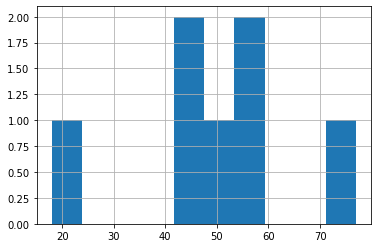

In [85]:
dogs['height_cm'].hist()
plt.show()

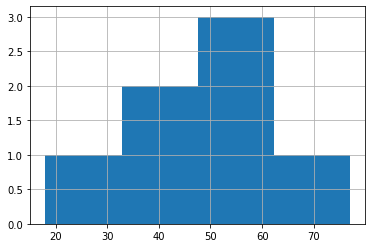

In [86]:
dogs['height_cm'].hist(bins= 4)
plt.show()

### Bar Plots

used to show the realtion between categorical variable and numeric variable

In [104]:
Av_wt_by_breed = dogs.groupby('breed')['height_cm'].mean()

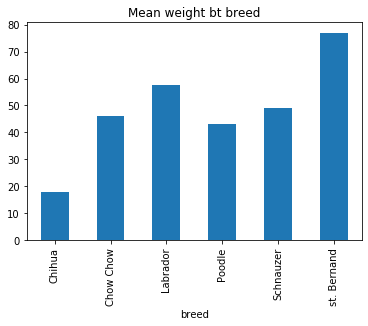

In [107]:
Av_wt_by_breed.plot(kind='bar', title='Mean weight bt breed')

### Line Plots

Great for visualizing the change of `numerical values` over `time`.

In [115]:
sully =pd.read_csv('sully.csv')
sully

,date,weight_kg
0,2019-01-31,36.1
1,2019-02-28,35.3
2,2019-03-31,32.0
3,2019-04-30,32.9
4,2019-05-28,32.0
5,2019-06-30,34.5


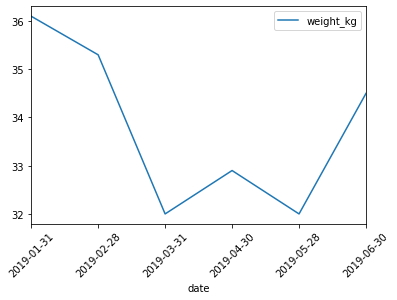

In [117]:
sully.plot(x='date', y='weight_kg', kind = 'line', rot=45)
plt.show()

### Scatter plots

Are great for visualizing the relation between two numeric variables

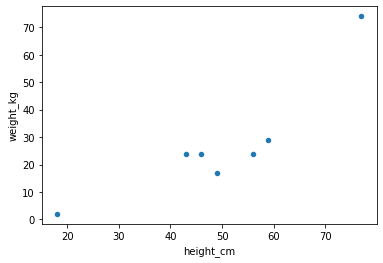

In [119]:
dogs.plot(x='height_cm',y='weight_kg', kind='scatter')
plt.show()

In [128]:
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


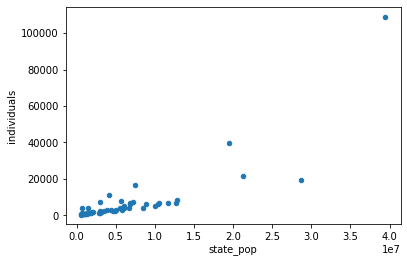

In [132]:
homelessness.plot(x='state_pop',y='individuals', kind='scatter')
plt.show()

### Layering Plots

In [134]:
dogs

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24,2013-07-01,0.56
1,Charlie,Poodle,Black,43,24,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011-12-11,0.49
4,Max,Labrador,Black,59,29,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74,2018-02-27,0.77


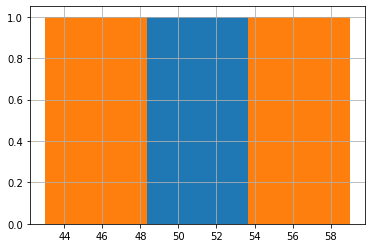

In [148]:
dogs[dogs["color"]=="Brown"]["height_cm"].hist(bins=2)
dogs[dogs["color"]=="Black"]["height_cm"].hist(bins=3)
plt.show()

### Let's add some transparency

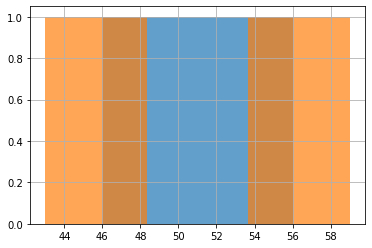

In [149]:
dogs[dogs["color"]=="Brown"]["height_cm"].hist(bins=2, alpha=0.7)
dogs[dogs["color"]=="Black"]["height_cm"].hist(bins=3, alpha =0.7)
plt.show()

### Let's Add Legend

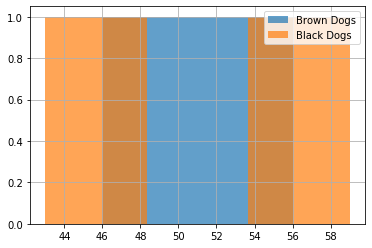

In [153]:
dogs[dogs["color"]=="Brown"]["height_cm"].hist(bins=2, alpha=0.7)
dogs[dogs["color"]=="Black"]["height_cm"].hist(bins=3, alpha =0.7)
plt.legend(["Brown Dogs","Black Dogs"])
plt.show()

### Avocado sales data

In [155]:
import matplotlib.pyplot as plt
import pandas as pd

In [171]:
avocados =pd.read_csv('avocados.csv')
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,12/27/2015,conventional,2015,0.95,small,9630000.0
1,12/20/2015,conventional,2015,0.98,small,8710000.0
2,12/13/2015,organic,2015,0.93,small,9860000.0
3,12/6/2015,conventional,2015,0.89,small,9410000.0
4,11/29/2015,conventional,2015,0.99,small,8100000.0


### Which avocado is most popular in the market?

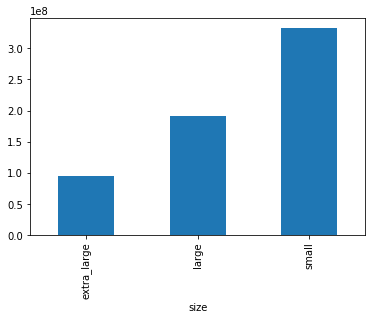

In [172]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

### Change in sales over time

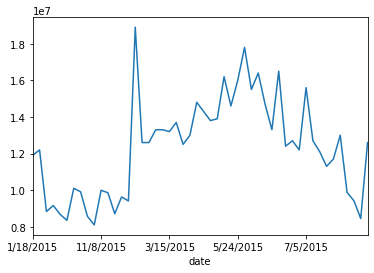

In [173]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(x='date', y='nb_sold_by_date', kind='line')

# Show the plot
plt.show()

### Avocado Supply and Demand

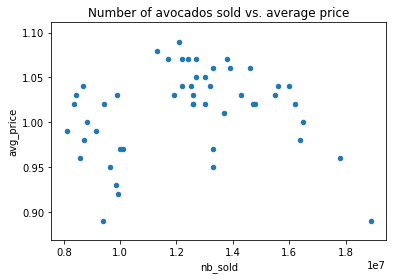

In [186]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter' ,title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

### Price Organic vs Conventional 

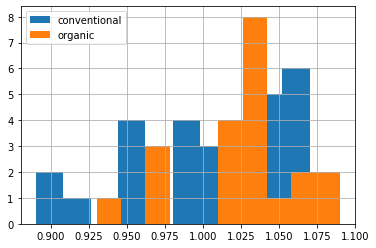

In [176]:
# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['avg_price'].hist()

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['avg_price'].hist()

# Add a legend
plt.legend(['conventional','organic'])

# Show the plot
plt.show()

### Transparebcy : argument aplpha 

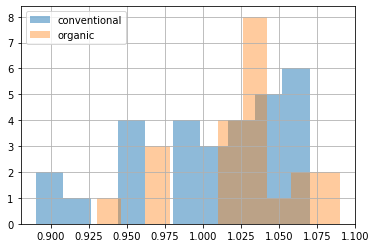

In [194]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha = 0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.4)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

### bins 

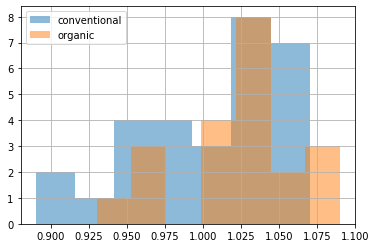

In [182]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins = 7)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins = 7)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## 4.2 Handling missing data

Most of the time our data set is not perfect. One of the problems is due to missing values. So wee need to know how to find what values are missing and what to do to handle the missing values.



In [195]:
import pandas as pd

In [196]:
dogs_with_nan = pd.read_csv('dogs_with_nan.csv')
dogs_with_nan

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24.0,2013-07-01,0.56
1,Charlie,Poodle,Black,43,NaN,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24.0,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17.0,2011-12-11,0.49
4,Max,Labrador,Black,59,NaN,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2.0,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74.0,2018-02-27,0.77


As we can  see, missing values in Pandas DF is represented as **NaN**.

### Detecting missing values: `.isna()` method

In [198]:
dogs_with_nan.isna()

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False


As we can see `.isna()` method returns a boolean value for all values in the table. 

False means the value is not Missing and 

True means the value is missing.

However, `.isna()` isn't useful when our data set is very big. 

### Detecting missing values: `.isna().any()` method

By combining `.isna()` method with `.any()` method we can easily detect which columns in our DF has missing values.

In [200]:
dogs_with_nan.isna().any()

name             False
breed            False
color            False
height_cm        False
weight_kg         True
date_of_birth    False
height_m         False
dtype: bool

As we can see `.isna().any()` returns all columns with missing values or not.

### Counting missing values : `.isna().sum()`

`.isna().sum()` allows us to count the number of missing values in each column.

In [202]:
dogs_with_nan.isna().sum()

name             0
breed            0
color            0
height_cm        0
weight_kg        2
date_of_birth    0
height_m         0
dtype: int64

As we can see above, the weight_kg column in our DF has `two` missing values.

### Plotting missing values : `.isna().sum().plot()`

Allows us to visualize the distribution of missing values among multiple variables or columns. 

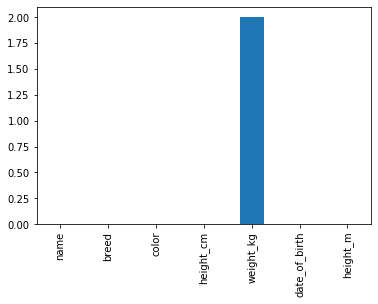

In [204]:
import matplotlib.pyplot as plt
dogs_with_nan.isna().sum().plot(kind='bar')
plt.show()

## Handling missing values

Once we find out what values are missing, we must do something about it right? Well, we can:

1. Remove missing values: `.dropna()`



2. Replace missing values: `.fillna()`


### 1. Remove missing values: `.dropna()`

In [206]:
dogs_with_nan.dropna()

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24.0,2013-07-01,0.56
2,Lucy,Chow Chow,Brown,46,24.0,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17.0,2011-12-11,0.49
5,Stella,Chihua,Tan,18,2.0,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74.0,2018-02-27,0.77


However there's a drowback with this approach!

If our data set has a lot of missing values we gonna lose a lot of observations. We gonna lose a lot of rows of data. 

### 2. Replace missing values: `.fillna()`

In [208]:
dogs_with_nan.fillna(0)

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,24.0,2013-07-01,0.56
1,Charlie,Poodle,Black,43,0.0,2016-09-16,0.43
2,Lucy,Chow Chow,Brown,46,24.0,2014-08-25,0.46
3,Cooper,Schnauzer,Gray,49,17.0,2011-12-11,0.49
4,Max,Labrador,Black,59,0.0,2017-01-20,0.59
5,Stella,Chihua,Tan,18,2.0,2015-04-20,0.18
6,Bernie,st. Bernand,White,77,74.0,2018-02-27,0.77


As we can see instead of removing observatuons we have replaced all the missing values with zero.

## 4.3 Reading data into a DataFrame

## Creating Data Frames

We can create DataFrames using three different approaches. 

1. From a list of dictionaries: row-by-row

2. From a dictionary of lists: column-by-column

3. From CSV file

### 1. From a list of dictionaries: row-by-row

In [209]:
list_of_dicts = [
{"name": "Ginger", "breed": "Dachshund", "height_cm": 22,
"weight_kg": 10, "date_of_birth": "2019-03-14"},
    
{"name": "Scout", "breed": "Dalmatian", "height_cm": 59,
"weight_kg": 25, "date_of_birth": "2019-05-09"}
]

DF= pd.DataFrame(list_of_dicts)
DF

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


### 2. From a dictionary of lists: column-by-column

In [213]:
dict_of_lists = {
"name": ["Ginger", "Scout"],
    
"breed": ["Dachshund", "Dalmatian"],
    
"height_cm": [22, 59],
    
"weight_kg": [10, 25],
    
"date_of_birth": ["2019-03-14","2019-05-09"]
}

new_dogs= pd.DataFrame(dict_of_lists)
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


### 3. From CSV file

### CSV file

    Contains comma separated values

    Designed to store tabular data

    It is common data storage file type

The above two methods create a DF by manually entering each entry. That is not pragmatic approach, it can't be used for creating big DataFrames!

Instead we can create a DataFrame by simply importing contents of a CSV file using `.read_csv()` method!

`pd.read_csv('file_name.csv')`

## `.to_csv()` Method

Lets say we wanted to export our data to CSV file, how do we do it?

In [215]:
#Let's Add bmi column to our new_dogs DF
new_dogs["bmi"] = new_dogs["weight_kg"] / (new_dogs["height_cm"] / 100) ** 2
new_dogs

,name,breed,height_cm,weight_kg,date_of_birth,bmi
0,Ginger,Dachshund,22,10,2019-03-14,206.611570
1,Scout,Dalmatian,59,25,2019-05-09,71.818443


In [219]:
## exporting to_csv

new_dogs.to_csv('new_dogs_with_bmi.csv') 

#This creates a file new_dogs_with_bmi.csv and exports it to the current directory